# Project: Wrangling and Analyze Data - WeRateDogs 

## Data Gathering
Here, the three pieces of data needed for this project are gathered and loaded into the workbook

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Importing essential libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests as r
import json
import json
from timeit import default_timer as timer

In [2]:
# Loading the twitter archive data
df = pd.read_csv('twitter-archive-enhanced.csv')
print('done!')

done!


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# using the requests library to download the tweet image prediction (image_predictions.tsv)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
print('done!')

done!


In [4]:
#load dataframe

df_ip = pd.read_csv('image_predictions.tsv', sep='\t')
print('done!')

done!


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

#### JSON file provided would be used since I could not have access to twitter's API

In [6]:
tj = []
with open('tweet-json.txt','r') as file:
    for i in file:
        tweets = json.loads(i)
        tj.append(tweets)

In [7]:
tj;

In [8]:
dff = pd.DataFrame(tj)

In [9]:
dff = dff[['id','geo','retweet_count','favorite_count']]
print('done!')

done!


## Assessing Data
In this section, we are going to detect and document at least **eight (8) quality issues and two (2) tidiness issue** through the use of **both** visual assessment and programmatic assessement to assess the data.

**Note:** It is important to pay attention to the following key points while accessing the data.

* We only want original ratings (no retweets) that have images. This is because not all items in the dataset are dog ratings as some are retweets.


* We would focus on the requirements of this project only which are to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.


* The fact that the rating numerators are greater than the denominators does not need to be cleaned as this [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.


* We do not need to gather the tweets beyond August 1st, 2017. Though we can, but the limitation is that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.



### Visual Assessment

In [10]:
#displaying first 5 rows of the twitter archive dataset 

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#displaying first 5 rows of the image prediction file

df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
#displaying first 5 rows of the extra information in the twitter json file

dff.head()

,id,geo,retweet_count,favorite_count
0,892420643555336193,None,8853,39467
1,892177421306343426,None,6514,33819
2,891815181378084864,None,4328,25461
3,891689557279858688,None,8964,42908
4,891327558926688256,None,9774,41048


### Programmatic Assessment

#### Programmatic Assessment of the twitter archive dataset

In [13]:
# Geting the dimension of the dataset

df.shape

(2356, 17)

##### The above reveals that the dataset has a total row of 2,356 and 17 columns 

In [14]:
# Getting a broad overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### The above reveals the data types as well as if there is any row with null values and as displayed, we can see that there are some rows with missing values such as retweeted_status_id,  retweeted_status_user_id, in_reply_to_status_id, etc. We can further reveal the null values in the next line of code

In [15]:
#Showing the null columns

df.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

##### null columns have been confirmed

In [16]:
# Getting the descriptive information of the dataset

df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
#checking for duplicates

df.duplicated().any()

False

#### cool, there are no duplicates in the dataset.  

In [18]:
#checking for unique values in the rating system

df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

##### we can see that there is a rating system of '0' which is unusal.

#### Programmatic Assessment of the image prediction file

In [19]:
# Geting the dimension of the dataset

df_ip.shape

(2075, 12)

##### The above reveals that the dataset has a total row of 2,075 and 12 columns

In [20]:
# Getting a broad overview of the dataset

df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### There happens to be no null values here. Let's confirm further.

In [21]:
df_ip.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

##### cool, no null values

In [22]:
#checking for duplicates

df_ip.duplicated().any()

False

##### cool, no duplicates

In [23]:
# Getting the descriptive information of the dataset

df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# checking if all images are dogs'

df_ip['p1_dog'].unique()

array([ True, False], dtype=bool)

##### This reveals that some of the images are not dogs'

#### Programmatic Assessment of the twitter json dataset

In [25]:
# Geting the dimension of the dataset

dff.shape

(2354, 4)

##### There are 2354 rows and 4 columns in this dataset

In [26]:
# Getting a broad overview of the dataset

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
geo               0 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


##### The geo column happens to be null with 0 values. Let's confirm further.

In [27]:
dff.isna().any()

id                False
geo                True
retweet_count     False
favorite_count    False
dtype: bool

##### Confirmed, geo column is null

In [28]:
#checking for duplicates

dff.duplicated().any()

False

##### Cools, there are no duplicates

In [29]:
# Getting the descriptive information of the dataset

dff.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

##### Twitter archive dataframe

1. Renaming of columns in the twitter JSON dataset for consistency.
   
2. Data type of twitter_id should not necessarily be an integer.

3. Conventionally, tweet_id should be the index of the dataset.

4. Unusual rating figures such as numerator and/or denominator with the zero (0) value.

5. Data type of timestamp should be a date not an obj(str)

6. Extract Year, Month, and Day from timestamp column

7. Drop time_stamp column as they are not really needed

8. Twitter archive dataset contains retweets and replies, we need only tweets
 

#### Image predictions dataframe
    
9. Confidence level in the image prediction file should be reprensented as percentage

### Tidiness issues

1. Having numerator and denominator for dog ratings in separate columns may be redundant, hence would be merged.

2. Dog stages are better merged into a column



## Cleaning Data
In this section, we will clean **all** of the issues documented during the assessing phase. 

**Note:** A copy of the original data would be made before commencing the cleaning task. We will then merge the three individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to produce a high-quality and tidy master pandas DataFrame as result.

In [30]:
# Making copies of original pieces of data

df_clean = df.copy()
df_ip_clean = df_ip.copy()
dff_clean = dff.copy()
print('copied!')

copied!


### Issue #1:

#### Renaming of columns in the twitter JSON dataset for consistency.

#### Define: 

##### Here, we would have to rename some columns in the twitter JSON dataset for consistency purpose

##### PS: Going forward, we would be working on the copies of data made.

#### Code

In [31]:
# Renaming the columns

dff_clean.rename(columns={'id':'tweet_id',
                          'favorite_count':'likes',
                          'retweet_count':'retweets'},
                 inplace=True)

print('done!')

done!


In [32]:
#confirming the renaming

dff_clean.head()

,tweet_id,geo,retweets,likes
0,892420643555336193,None,8853,39467
1,892177421306343426,None,6514,33819
2,891815181378084864,None,4328,25461
3,891689557279858688,None,8964,42908
4,891327558926688256,None,9774,41048


### Issue #2:

#### Data type of twitter_id should not necessarily be an integer.

#### Define: 

##### Here, we would have to change the data type of twittter_id from integer to a string

##### PS: Going forward, we would be working on the copies of data made.

#### Code

##### Confirming the data types of twitter_id in each dataset 

In [33]:
# confirming the data type of the tweet id in twitter archive dataset

df_clean['tweet_id'].dtype

dtype('int64')

In [34]:
# confirming the data type of the tweet id in image prediction dataset

df_ip_clean['tweet_id'].dtype

dtype('int64')

In [35]:
# confirming the data type of the tweet id in twitter JSON dataset

dff_clean['tweet_id'].dtype

dtype('int64')

##### Let's convert!

In [36]:
# Converting tweet id from integer to string

df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)

In [37]:
# Converting tweet id from integer to string

df_ip_clean['tweet_id'] = df_ip_clean['tweet_id'].astype(str)

In [38]:
# Converting id from integer to string

dff_clean['tweet_id'] = dff_clean['tweet_id'].astype(str)

#### Test

In [39]:
# Confirming the conversion made

df_clean['tweet_id'].dtype

dtype('O')

In [40]:
# Confirming the conversion made

df_ip_clean['tweet_id'].dtype

dtype('O')

In [41]:
# Confirming the conversion made

dff_clean['tweet_id'].dtype

dtype('O')

#### All conversions have been successfully made!

### Issue #3

#### Conventionally, tweet_id should be the index of the dataset

#### Define

##### Due to the uniqueness of the tweet_id, it is advisable to set it as index of the dataset

#### Code

In [42]:
#Setting tweet id as the index of the dataset

df_clean = df_clean.set_index('tweet_id')

In [43]:
#Setting tweet id as the index of the dataset

df_ip_clean = df_ip_clean.set_index('tweet_id')

In [44]:
#Setting tweet id as the index of the dataset

dff_clean = dff_clean.set_index('tweet_id')

#### Test

In [45]:
# checking by showing the first five entries of each dataset

df_clean.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [46]:
# checking by showing the first five entries of each dataset

df_ip_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
# checking by showing the first five entries of each dataset

dff_clean.head()

,geo,retweets,likes
tweet_id,,,
892420643555336193,None,8853,39467
892177421306343426,None,6514,33819
891815181378084864,None,4328,25461
891689557279858688,None,8964,42908
891327558926688256,None,9774,41048


#### The id's of the datasets are now the index of the respective dataset

### Issue #4

#### Unusual rating figures such as numerator and/or denominator with the zero (0) value

#### Define

##### Based on the unique rating rating system, it is unusual for the denominator nor the numerator to have a zero because;
- The ratings are usually done over 10
- Also, it is common for dogs to be rated over 10

#### Code

In [48]:
# Keeping non-zero rating_numerator

df_clean = df_clean[(df_clean['rating_numerator']!=0)]

In [49]:
# Keeping non-zero rating_denominator

df_clean = df_clean[(df_clean['rating_denominator']!=0)]

#### Test

In [50]:
# checking unique values in the rating_numerator column

df_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,   75,    7,   84,    9,   24,    8,    1,   27,    3,    4,
        165, 1776,  204,   50,   99,   80,   45,   60,   44,  143,  121,
         20,   26,    2,  144,   88])

In [51]:
# checking unique values in the rating_denominator column

df_clean['rating_denominator'].unique()

array([ 10,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40, 130,
       110,  16, 120,   2])

#### The problem of zero value is thereby solved!

### Issue #5

#### Data type of timestamp should be a date not an obj(str)

#### Define

##### Logically, the timestamp column should be of a date and not an obj(str) datatype that it is 

#### Code

In [52]:
# Converting the data type

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [53]:
# Confirming the data type of timestamp

df_clean[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2353 entries, 892420643555336193 to 666020888022790149
Data columns (total 1 columns):
timestamp    2353 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.8+ KB


#### The data type of the time stamp column has been successfully converted

### Issue #6

#### Extract Year, Month, and Day from the converted timestamp column

#### Define

##### It is advisable to extract year, month, and day from the converted timestamp into a new column

#### Code

In [54]:
# Extracting the year

df_clean['year'] = df_clean['timestamp'].dt.year

print('done!')

done!


In [55]:
# Extracting the month name

df_clean['month'] = df_clean['timestamp'].dt.month_name()

print('done!')

done!


In [56]:
# Extracting the weekday name

df_clean['day'] = df_clean['timestamp'].dt.weekday_name

print('done!')

done!


#### Test

In [57]:
# Confirming the extraction by showing the count of each year

df_clean['year'].value_counts()

2016    1182
2015     690
2017     481
Name: year, dtype: int64

In [58]:
# Confirming the extraction by showing the count of each month

df_clean['month'].value_counts()

December     458
November     390
January      288
February     211
March        205
July         161
June         155
April        120
May          116
October       88
September     84
August        77
Name: month, dtype: int64

In [59]:
# Confirming the extraction by showing the count of each day

df_clean['day'].value_counts()

Monday       384
Tuesday      356
Wednesday    354
Friday       331
Thursday     326
Saturday     309
Sunday       293
Name: day, dtype: int64

#### Year, month, and day has been successfully extracted. We can also see the count of each at a glance.

#### The timestamp column would be dropped subsequently as it appears not to be useful anymore.

### Issue #7

#### Drop timestamp column

#### Define

##### It is advisable to drop timestamp column since it is not relevant anymore. It is a good practice to get rid of unnecessary columns in our dataset.

#### Code

In [60]:
# Drop timestamp column 

df_clean.drop(columns=['timestamp'],inplace=True)
print('dropped!')

dropped!


#### Test

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2353 entries, 892420643555336193 to 666020888022790149
Data columns (total 18 columns):
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2295 non-null object
rating_numerator              2353 non-null int64
rating_denominator            2353 non-null int64
name                          2353 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
year                          2353 non-null int64
month                         2353 non-null object
day   

##### Hence, from the above, we can see that timestamp column has been successfully dropped.

### Issue #8

#### Twitter archive dataset contains retweets and replies, we need only tweets

#### Define

##### Due to the nature of the dataset that we need i.e., tweets, it is imperative that we clean the dataset to contain only tweets by excluding both retweets and replies.

#### Code

In [62]:
# Keeping tweets with no replies

df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

In [63]:
# Keeping tweets with no retweets

df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

#### Test

In [64]:
# checking if there are still tweets with replies

df_clean['in_reply_to_status_id'].notna().any()

False

In [65]:
# checking if there are still tweets with retweets

df_clean['retweeted_status_id'].notna().any()

False

##### Perfect!, no more retweets and replies

### Issue #9

#### Confidence level in the image prediction file should be reprensented as percentage

#### Define

##### It is quite coherent to see the confidence level as a percentage rather than a fraction as presented

#### Code

In [66]:
# Expressing p1_conf in percentage

df_ip_clean['p1_conf'] = (df_ip_clean['p1_conf']*100).round(1)

In [67]:
# Expressing p2_conf in percentage

df_ip_clean['p2_conf'] = (df_ip_clean['p2_conf']*100).round(1)

In [68]:
# Expressing p3_conf in percentage

df_ip_clean['p3_conf'] = (df_ip_clean['p3_conf']*100).round(1)

#### Test

In [69]:
df_ip_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5,True,collie,15.7,True,Shetland_sheepdog,6.1,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.7,True,miniature_pinscher,7.4,True,Rhodesian_ridgeback,7.2,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True


##### Having the confidence level as a percentage is cool

### Issue #10

#### Having numerator and denominator for dog ratings in separate columns may be redundant, hence would be merged.



#### Define

##### Since both rating numerator and denominator are baiscally referring to dog ratings, it is quite redundant to keep both columns



#### Code

In [70]:
# The rating_denominator column would be dropped

df_clean.drop(columns=['rating_denominator'],inplace=True)
print('Already dropped!')

Already dropped!


In [71]:
# The rating_numerator would be renamed

df_clean.rename(columns={'rating_numerator':'ratings_over_10'},inplace=True)
print('renamed!')

renamed!


#### Test

In [72]:
# checking

df_clean.head()

,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,ratings_over_10,name,doggo,floofer,pupper,puppo,year,month,day
tweet_id,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None,2017,August,Tuesday
892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None,2017,August,Tuesday
891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None,2017,July,Monday
891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None,2017,July,Sunday
891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None,2017,July,Saturday


##### Redundancy has been taken care of

### Issue #11

#### Dog stages are better merged into a column

#### Define

##### Having dog stages in several columns may be redundant, hence, it is necessary to have them merged. We would first replace none values in the stage column with an empty string, then contenant the stages and finally drop individual dog stages. Let's roll!

#### Code

In [73]:
# Replacing stages with 'none' values with '' so we can concatenate later

df_clean.doggo.replace('None', '', inplace=True) 
df_clean.floofer.replace('None', '', inplace=True)  
df_clean.pupper.replace('None', '', inplace=True)  
df_clean.puppo.replace('None', '', inplace=True)  

# Then concatenate stage columns.
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean['stage'].value_counts()

                1760
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [74]:
df_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)
print('dropped!')

dropped!


#### Test

In [75]:
df_clean['stage'].value_counts()

                1760
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [76]:
df_clean.head()

,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,ratings_over_10,name,year,month,day,stage
tweet_id,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,2017,August,Tuesday,
892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,2017,August,Tuesday,
891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,2017,July,Monday,
891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,2017,July,Sunday,
891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,2017,July,Saturday,


##### Whew!, stages have been combined and individual stages dropped.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

#### Here, the files would be merged based on a common column "tweet_id". However, we would check to confirm the existence of the column in all our files before proceeding to merge.

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 892420643555336193 to 666020888022790149
Data columns (total 14 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
ratings_over_10               2096 non-null int64
name                          2096 non-null object
year                          2096 non-null int64
month                         2096 non-null object
day                           2096 non-null object
stage                         2096 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 245.6+ KB


In [78]:
df_ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [79]:
dff_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
geo         0 non-null object
retweets    2354 non-null int64
likes       2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [80]:
twitter_archive_master= df_clean.merge(dff_clean, on= 'tweet_id', how= 'inner').merge(df_ip_clean, on= 'tweet_id', how= 'inner')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1970 entries, 892420643555336193 to 666020888022790149
Data columns (total 28 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        1970 non-null object
text                          1970 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1970 non-null object
ratings_over_10               1970 non-null int64
name                          1970 non-null object
year                          1970 non-null int64
month                         1970 non-null object
day                           1970 non-null object
stage                         1970 non-null object
geo                           0 non-null object
retweets                      1970 non-null int64
likes                         1970 non-null int64
jpg_url           

In [81]:
# Saving the file to a csv format

twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
print('saved!')

saved!


## Analyzing and Visualizing Data
In this section, we would analyze and visualize our wrangled data. **Insights and a Visualization would be made as well.**

In [82]:
# Visually assessing the master dataset

df = pd.read_csv('twitter_archive_master.csv')
df.head()

,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,ratings_over_10,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,...,1,orange,9.7,False,bagel,8.6,False,banana,7.6,False
1,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,...,1,Chihuahua,32.4,True,Pekinese,9.1,True,papillon,6.9,True
2,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,...,1,Chihuahua,71.6,True,malamute,7.8,True,kelpie,3.1,True
3,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,...,1,paper_towel,17.0,False,Labrador_retriever,16.8,True,spatula,4.1,False
4,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,...,2,basset,55.6,True,English_springer,22.6,True,German_short-haired_pointer,17.5,True


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 28 columns):
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        1970 non-null object
text                          1970 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1970 non-null object
ratings_over_10               1970 non-null int64
name                          1970 non-null object
year                          1970 non-null int64
month                         1970 non-null object
day                           1970 non-null object
stage                         303 non-null object
geo                           0 non-null float64
retweets                      1970 non-null int64
likes                         1970 non-null int64
jpg_url                       1970 non-null

### Insights:
1. Top 3 dog names

2. Dog stage with highest retweets

3. Year with the highest likes

#### Insight 1

##### Top 3 dog names

In [84]:
df['name'].value_counts().head(3)

None       523
a           55
Charlie     11
Name: name, dtype: int64

##### Here, we can see that about 577 of the dogs have no name, next highest on the list is 'a' which seems to be pretty unusual as a name and the third happens to be 'Charlie' with a count of 11

#### Insight 2

##### Dog stage with highest retweets

In [85]:
df.groupby('stage')['retweets'].sum().sort_values(ascending=False).astype(int)

stage
pupper          478883
doggo           448919
puppo           142427
doggopupper      35178
floofer          34781
doggopuppo       19196
doggofloofer      3433
Name: retweets, dtype: int64

##### Based on the above, it can be concluded that dogs with stage 'pupper' has the highest number of retweets

#### Insight 3

##### Year with the highest likes

Text(0,0.5,'Likes')

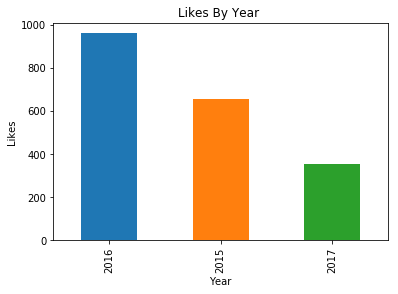

In [86]:
# Year with the highest like

value=twitter_archive_master['year'].value_counts()
value.plot(kind='bar',title='Likes By Year ');
plt.xlabel('Year')
plt.ylabel('Likes')

##### Here, we can see that 2016 has the highest number of likes

### Visualization

Text(0,0.5,'Likes')

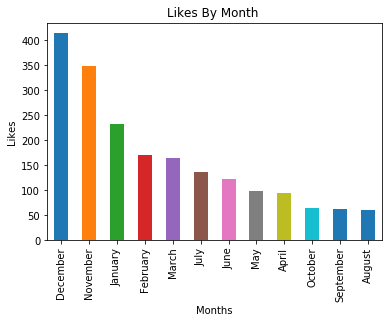

In [87]:
# Rate of tweet by year

value=twitter_archive_master['month'].value_counts()
value.plot(kind='bar',title='Likes By Month ');
plt.xlabel('Months')
plt.ylabel('Likes')

##### Here, we can see that December has the highest number of likes through out the whole year. This could be due to the merriments of the season or somme other factors. It is worthy of note that the merriment stated does not absolutely determines the number of likes. Thank you!